Nombre: Albert Pumar

# ANÁLISIS DE DATOS MACHINE LEARNING USANDO SCIKIT LEARN


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, multilabel_confusion_matrix, f1_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from pandas_profiling import ProfileReport
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ROCAUC

# CASO DE DATASET MULTICLASS

In [2]:
df = pd.read_csv('1-glass.csv', header = 0, delimiter = ";")
df

Id      RI    Na   MG   AL    Si   K   Ca   Ba  Fe  Type
0      1  152101  1364  449  110  7178   6  875    0   0     1
1      2  151761  1389  360  136  7273  48  783    0   0     1
2      3  151618  1353  355  154  7299  39  778    0   0     1
3      4  151766  1321  369  129  7261  57  822    0   0     1
4      5  151742  1327  362  124  7308  55  807    0   0     1
..   ...     ...   ...  ...  ...   ...  ..  ...  ...  ..   ...
209  210  151623  1414    0  288  7261   8  918  106   0     7
210  211  151685  1492    0  199  7306   0  840  159   0     7
211  212  152065  1436    0  202  7342   0  844  164   0     7
212  213  151651  1438    0  194  7361   0  848  157   0     7
213  214  151711  1423    0  208  7336   0  862  167   0     7

[214 rows x 11 columns]

INFORMACIÓN DEL DATASET

In [3]:
X = df.drop("Type", axis="columns")
y = df["Type"]

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

print("INFORMACIÓN CUANTITATIVA DEL DATASET: mean, std, min, max,...")
display(df.describe())

print("TAMAÑO DEL DATASET:", df.shape, ", Número de atributos:", X.shape[1])

_, classes_count = np.unique(df["Type"].to_numpy(), return_counts = True)
print("Número de observaciones por clase:", classes_count, ", Número de clases:", len(classes_count))


INFORMACIÓN CUANTITATIVA DEL DATASET: mean, std, min, max,...


Id             RI           Na          MG          AL  \
count  214.000000     214.000000   214.000000  214.000000  214.000000   
mean   107.500000  151836.542056  1340.785047  268.453271  144.490654   
std     61.920648     303.686374    81.660356  144.240784   49.926965   
min      1.000000  151115.000000  1073.000000    0.000000   29.000000   
25%     54.250000  151652.250000  1290.750000  211.500000  119.000000   
50%    107.500000  151768.000000  1330.000000  348.000000  136.000000   
75%    160.750000  151915.750000  1382.500000  360.000000  163.000000   
max    214.000000  153393.000000  1738.000000  449.000000  350.000000   

                Si           K           Ca          Ba          Fe  \
count   214.000000  214.000000   214.000000  214.000000  214.000000   
mean   7265.093458   49.705607   895.696262   17.504673    5.700935   
std      77.454579   65.219185   142.315349   49.721926    9.743870   
min    6981.000000    0.000000   543.000000    0.000000    0.000000   
25%    7228.000000   12.250000   824.000000    0.000000    0.000000   
50%    7279.000000   55.500000   860.000000    0.000000    0.000000   
75%    7308.750000   61.000000   917.250000    0.000000   10.000000   
max    7541.000000  621.000000  1619.000000  315.000000   51.000000   

             Type  
count  214.000000  
mean     2.780374  
std      2.103739  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      7.000000

TAMAÑO DEL DATASET: (214, 11) , Número de atributos: 10
Número de observaciones por clase: [70 76 17 13  9 29] , Número de clases: 6


ELIMINACIÓN DE NANS

In [4]:
print("Tamaño del dataset antes de eliminar Nans:", df.shape[0]*df.shape[1])
df2 = df.dropna(how='any', axis=0)
print("Tamaño del dataset si eliminamos los Nans:", str(df2.shape[0]*df2.shape[1]))

Tamaño del dataset antes de eliminar Nans: 2354
Tamaño del dataset si eliminamos los Nans: 2354


NORMALIZACIÓN DE LOS DATOS

In [20]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

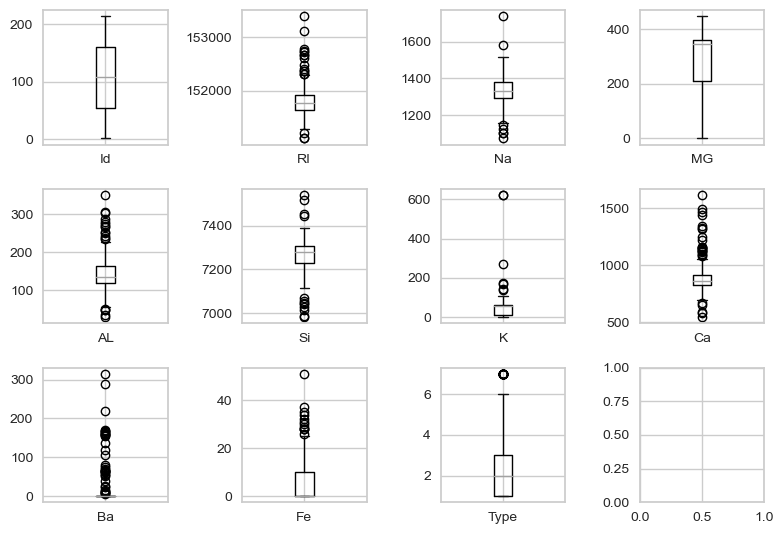

In [80]:
fig, axs = plt.subplots(3, 4)
        
for header, ax in zip(df, axs.ravel()):
    df.boxplot(column=header, ax=ax)

    ax.set_xlabel("")

fig.tight_layout()
plt.show()

De los plots vemos que en algunos atributos hay algunos puntos que están más separados, por tanto tenemos outliers. Utilizamos pues RobustScaler, ya que funciona mejor aunque haya algún outlier.

In [5]:
rs_train = StandardScaler().fit(X_train)
X_train_norm = rs_train.transform(X_train)

rs_test = StandardScaler().fit(X_test)
X_test_norm = rs_test.transform(X_test)

RECODIFICACIÓN DE LOS DATOS

No hace falta recodificar los datos pues no hay valores categóricos o cualitativos.

MEJOR MEDIDA DE RENDIMENTO

Para datasets desbalanceados la medida a evitar sería la accuracy, ya que en el caso de siempre predecir para la clase mayoritaria (por ejemplo) obtendremos buenos resultados de accuracy con un mal modelo. Por tanto, la mejor medida de rendimiento es el F1-SCORE ya que relaciona la precisión con el recall. En este caso, al tratarse de un dataset multiclase la mejor métrica es el F1-SCORE ponderado, dando mayor o menor importancia en función del número de observaciones de la clase.

SELECCIÓN DE MÉTODOS DE CLASIFICACIÓN

Como el dataset es multiclase necesitaré dos modelos que me permitan realizar este tipo de clasificación. La primera elección es el OVR ya que funciona mejor que el OVO en datos desbalanceados y el segundo método será utilizar Random Forests ya que también me permiten trabajar con multiclase.

MEJOR CONJUNTO DE PARÁMETROS

In [7]:
parameters_LR = {"penalty":('l1', 'l2', "none"), "solver": ('lbfgs', 'liblinear'), "max_iter": [100, 1000, 5000],
                  "n_jobs": [None, -1, 10], "tol": [1e-4, 1e-1, 1e-7], "C": [0, 1.0, 10.0], "random_state": (None, 0), 
                  "multi_class": ("auto", "ovr")}
model = LogisticRegression()
clf = GridSearchCV(model, parameters_LR, n_jobs=-1)
clf.fit(X_train_norm, y_train)
clf.best_params_

C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4860 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError

{'C': 10.0,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.1}

In [8]:
parameters_RF = {'n_estimators': [10, 100, 1000], 'criterion': ('gini', 'entropy', 'log_loss'), 'bootstrap': (True, False), 
                  'n_jobs': (None, -1, 2), 'random_state': (None, 0)}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters_RF, n_jobs=-1)
clf.fit(X_train_norm, y_train)
clf.best_params_

C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\apuma\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\apuma\anaconda3\lib\site-packages\

{'bootstrap': False,
 'criterion': 'gini',
 'n_estimators': 10,
 'n_jobs': 2,
 'random_state': None}

In [14]:
from sklearn.tree import DecisionTreeClassifier 

parameters_DT = {'criterion': ('gini', 'entropy'), 'splitter': ("best", "random"), 'random_state': (None, 0),
                 'max_features': ("auto", "sqrt", "log2")}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters_DT, n_jobs=-1)
clf.fit(X_train_norm, y_train)
clf.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'random_state': 0,
 'splitter': 'best'}

CALCULAR COSTE COMPUTACIONAL

In [10]:
start = time.time()

model = LogisticRegression(C=10.0, max_iter=1000, multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
                           solver='lbfgs', tol=0.0001)
ovr = OneVsRestClassifier(model)
ovr.fit(X_train_norm, y_train)
end = time.time()

print("Coste computacional del modelo OVR:", end-start, "segundos.")

Coste computacional del modelo OVR: 0.12738728523254395 segundos.


In [12]:
start = time.time()

rf = RandomForestClassifier(bootstrap = True, criterion = "gini", n_estimators = 1000, n_jobs = None, random_state = 0)
rf.fit(X_train_norm, y_train)
end = time.time()

print("Coste computacional del modelo RANDOM FOREST:", end-start, "segundos.")

Coste computacional del modelo RANDOM FOREST: 4.448637247085571 segundos.


In [15]:
from sklearn.tree import DecisionTreeClassifier 

start = time.time()

dt = DecisionTreeClassifier(criterion = "entropy", max_features = "auto", splitter = "best", random_state = 0)
dt.fit(X_train_norm, y_train)
end = time.time()

print("Coste computacional del modelo DECISION TREE:", end-start, "segundos.")


Coste computacional del modelo DECISION TREE: 0.00801849365234375 segundos.


Vemos entonces, com el tiempo de ejecución es menor en el caso del OVR, podemos concluir que tiene mejor coste computacional que el Random Forest.

MEJOR THRESHOLD

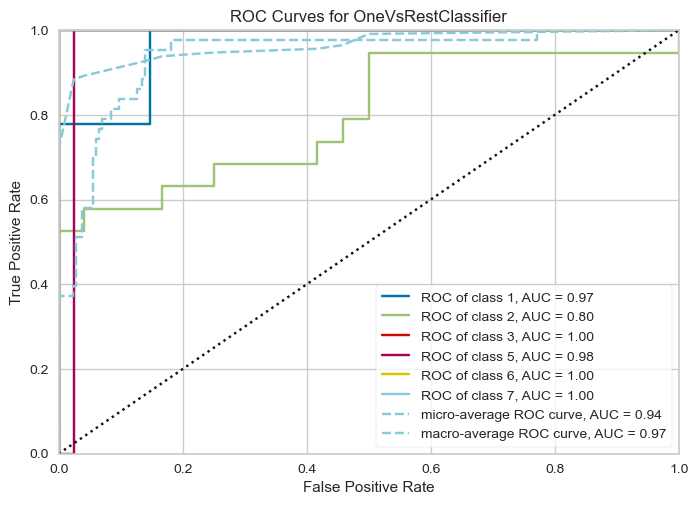

<AxesSubplot:title={'center':'ROC Curves for OneVsRestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [16]:
visualizer = ROCAUC(ovr)

visualizer.fit(X_train_norm, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_norm, y_test)        # Evaluate the model on the test data
visualizer.show() 

Caso binario para cada clase. Micro-score sigue la estrategia de clasificación OVR y macro-score, la estrategia OVO.

MATRIZ DE CONFUSIÓN MULTICLASE

In [17]:
y_pred_OVR = ovr.predict(X_test_norm)
CM_OVR = multilabel_confusion_matrix(y_test, y_pred_OVR, labels=[1, 2, 3, 4, 5, 6, 7])
display(CM_OVR)
print("Accuracy del modelo OVR:", accuracy_score(y_test, y_pred_OVR))
print("F1-SCORE del modelo OVR:", f1_score(y_test, y_pred_OVR, average="weighted"))

array([[[27,  7],
        [ 0,  9]],

       [[20,  4],
        [ 8, 11]],

       [[38,  0],
        [ 3,  2]],

       [[43,  0],
        [ 0,  0]],

       [[40,  1],
        [ 1,  1]],

       [[41,  0],
        [ 0,  2]],

       [[37,  0],
        [ 0,  6]]], dtype=int64)

Accuracy del modelo OVR: 0.7209302325581395
F1-SCORE del modelo OVR: 0.7123548954465507


Esta función nos devuelve la matriz de confusión para cada clase, de tal forma que para la primera clase el modelo ha marcado como clase 1 en 27 casos que la clase era 1 (True Positive), 9 veces como que no era clase 1 cuando no era clase 1 (True Negative) y 7 veces ha marcado que era clase 1 cuando en realidad no lo eran (False Negative).

In [18]:
y_pred_RF = rf.predict(X_test_norm)
CM_RF = multilabel_confusion_matrix(y_test, y_pred_RF, labels=[1, 2, 3, 4, 5, 6, 7])
display(CM_RF)
print("Accuracy del modelo RF:", accuracy_score(y_test, y_pred_RF))
print("F1-SCORE del modelo RF:", f1_score(y_test, y_pred_RF, average="weighted"))

array([[[31,  3],
        [ 0,  9]],

       [[23,  1],
        [ 3, 16]],

       [[38,  0],
        [ 1,  4]],

       [[43,  0],
        [ 0,  0]],

       [[41,  0],
        [ 0,  2]],

       [[41,  0],
        [ 0,  2]],

       [[37,  0],
        [ 0,  6]]], dtype=int64)

Accuracy del modelo RF: 0.9069767441860465
F1-SCORE del modelo RF: 0.9080841638981173


In [19]:
y_pred_DT = dt.predict(X_test_norm)
CM_DT = multilabel_confusion_matrix(y_test, y_pred_DT, labels=[1, 2, 3, 4, 5, 6, 7])
display(CM_DT)
print("Accuracy del modelo DT:", accuracy_score(y_test, y_pred_DT))
print("F1-SCORE del modelo DT:", f1_score(y_test, y_pred_DT, average="weighted"))

array([[[28,  6],
        [ 0,  9]],

       [[20,  4],
        [ 6, 13]],

       [[38,  0],
        [ 4,  1]],

       [[43,  0],
        [ 0,  0]],

       [[40,  1],
        [ 1,  1]],

       [[41,  0],
        [ 0,  2]],

       [[37,  0],
        [ 0,  6]]], dtype=int64)

Accuracy del modelo DT: 0.7441860465116279
F1-SCORE del modelo DT: 0.7241602067183462


Vemos que en todos casos los resultados se pueden mejorar. Esto se debe a que el dataset está desbalanceado (hasta el punto de que hay una clase que no tiene ninguna observación). Por eso miraré si balanceando el dataset se obtienen mejores resultados.

# PROBAMOS AHORA DE BALANCEAR EL DATASET Y UTILIZAR OVO I RANDOM FORESTS PARA MEJORAR RESULTADDOS.

Utilizaré SMOTE Oversampling para copiar nuevas observaciones e igualar en número a la clase con más observaciones.

In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

_, classes_count = np.unique(y.to_numpy(), return_counts = True)
print("Número de observaciones por clase:", classes_count, ", Número de clases:", len(classes_count))

Número de observaciones por clase: [76 76 76 76 76 76] , Número de clases: 6


In [21]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
rs_train = StandardScaler().fit(X_train)
X_train_norm = rs_train.transform(X_train)

rs_test = StandardScaler().fit(X_test)
X_test_norm = rs_test.transform(X_test)

In [22]:
start = time.time()

model = LogisticRegression(C=10.0, max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
                           solver='lbfgs', tol=0.0001)
ovo = OneVsOneClassifier(model)
ovo.fit(X_train_norm, y_train)
end = time.time()

print("Coste computacional del modelo OVO:", end-start, "segundos.")

Coste computacional del modelo OVO: 0.2409970760345459 segundos.


Utilizo OVO en lugar de OVR ya que a priori funciona mejor con datasets balanceados.

In [23]:
start = time.time()

rf = RandomForestClassifier(bootstrap = True, criterion = "gini", n_estimators = 1000, n_jobs = None, random_state = 0)
rf.fit(X_train_norm, y_train)
end = time.time()

print("Coste computacional del modelo RANDOM FOREST:", end-start, "segundos.")

Coste computacional del modelo RANDOM FOREST: 4.969973087310791 segundos.


Vemos que OVO/OVR sigue siendo más rápido que RF pero los tiempos han aumentado ligeramente debido a que hay ahora más datos.

In [24]:
y_pred_OVO = ovo.predict(X_test_norm)
CM_OVO = multilabel_confusion_matrix(y_test, y_pred_OVO)
display(CM_OVO)
print("Accuracy del modelo OVO:", accuracy_score(y_test, y_pred_OVO))
print("F1-SCORE del modelo OVO:", f1_score(y_test, y_pred_OVO, average="weighted"))

array([[[77,  2],
        [ 0, 13]],

       [[79,  0],
        [ 3, 10]],

       [[74,  1],
        [ 0, 17]],

       [[76,  0],
        [ 0, 16]],

       [[75,  0],
        [ 0, 17]],

       [[76,  0],
        [ 0, 16]]], dtype=int64)

Accuracy del modelo OVO: 0.967391304347826
F1-SCORE del modelo OVO: 0.9661963273021874


In [25]:
y_pred_RF = rf.predict(X_test_norm)
CM_RF = multilabel_confusion_matrix(y_test, y_pred_RF)
display(CM_RF)
print("Accuracy del modelo RF:", accuracy_score(y_test, y_pred_RF))
print("F1-SCORE del modelo RF:", f1_score(y_test, y_pred_RF, average="weighted"))

array([[[78,  1],
        [ 0, 13]],

       [[74,  5],
        [ 1, 12]],

       [[75,  0],
        [ 5, 12]],

       [[75,  1],
        [ 0, 16]],

       [[75,  0],
        [ 1, 16]],

       [[76,  0],
        [ 0, 16]]], dtype=int64)

Accuracy del modelo RF: 0.9239130434782609
F1-SCORE del modelo RF: 0.9237770003886946


Vemos que las métricas mejoran respecto a cuando el dataset estaba desbalanceado (debemos fijarnos en el F1-SCORE). Por tanto, considero que vale la pena hacer un proceso previo de balanceamiento del dataset, ya que se consiguen modelos que obtienen resultados muy superiores.

<!--  -->

# CASO DE DATASET BINÀRI

In [26]:
df2 = pd.read_csv('winequalityN.csv', header = 0, delimiter = ",")
df2['is_red_wine'] = (df2["type"] == 'red').astype(int)

#Defining the splits for categories. 1-5 will be poor quality, 6-10 will be great
bins = [1,5,10]

#0 for low quality, 1 for great quality
quality_labels=[0,1]
df2['quality_categorical'] = pd.cut(df2['quality'], bins=bins, labels=quality_labels, include_lowest=True)
# Split the data into features and target label
quality_raw = df2['quality_categorical']
features_raw = df2.drop(['type', 'quality', 'quality_categorical'], axis = 1)
df2

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  is_red_wine quality_categorical  
0          0.45      8.8        6            0                   1  
1          0.49      9.5        6            0                   1  
2          0.44     10.1        6            0                   1  
3          0.40      9.9        6            0                   1  
4          0.40      9.9        6            0                   1  
...         ...      ...      ...          ...                 ...  
6492       0.58     10.5        5            1                   0  
6493        NaN     11.2        6            1                   1  
6494       0.75     11.0        6            1                   1  
6495       0.71     10.2        5            1                   0  
6496       0.66     11.0        6            1                   1  

[6497 rows x 15 columns]

In [27]:
print("INFORMACIÓN CUANTITATIVA DEL DATASET: mean, std, min, max,...")
display(df2.describe())

print("TAMAÑO DEL DATASET:", df2.shape, ", Número de atributos:", df2.shape[1])

_, classes_count = np.unique(df2["quality_categorical"].to_numpy(), return_counts = True)
print("Número de observaciones por clase:", classes_count, ", Número de clases:", len(classes_count))


INFORMACIÓN CUANTITATIVA DEL DATASET: mean, std, min, max,...


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  is_red_wine  
count  6488.000000  6493.000000  6497.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378     0.246114  
std       0.160748     0.148814     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

TAMAÑO DEL DATASET: (6497, 15) , Número de atributos: 15
Número de observaciones por clase: [2384 4113] , Número de clases: 2


Vemos que el dataset está desbalanceado puesto que una clase tiene casi el doble de muestras que la otra.

COMPROBACIÓN NANS

In [28]:
print("Tamaño antes de eliminar NANs:", df2.shape)
df2 = df2.dropna(how='any', axis=0)
print("Tamaño después de eliminar NANs:", df2.shape)

Tamaño antes de eliminar NANs: (6497, 15)
Tamaño después de eliminar NANs: (6463, 15)


In [29]:
X2 = df2.drop("quality_categorical", axis="columns")
#X2 = X2.drop("type", axis="columns")
y2 = df2["quality_categorical"]

X2_train, X2_test, y2_train, y2_test= train_test_split(X2, y2,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

RECODIFICACIÓN DE LOS DATOS

In [5]:
df2

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  is_red_wine quality_categorical  
0          0.45      8.8        6            0                   1  
1          0.49      9.5        6            0                   1  
2          0.44     10.1        6            0                   1  
3          0.40      9.9        6            0                   1  
4          0.40      9.9        6            0                   1  
...         ...      ...      ...          ...                 ...  
6491       0.82      9.5        6            1                   1  
6492       0.58     10.5        5            1                   0  
6494       0.75     11.0        6            1                   1  
6495       0.71     10.2        5            1                   0  
6496       0.66     11.0        6            1                   1  

[6463 rows x 15 columns]

Vemos que el atributo type es de tipo categórico por tanto debería codificar esta columna. Como se trata de colores (tipo de vino) utilizaré el OneHot Encoder para que no haya ordinalidad cuando no sea necesario.

In [30]:
enc = OneHotEncoder(handle_unknown='ignore')
X2_train_enc = enc.fit_transform(X2_train)
X2_test_enc = enc.transform(X2_test)

NORMALIZACIÓN DE LOS DATOS (EN PRINCIPIO NO HACE FALTA)

<AxesSubplot:>

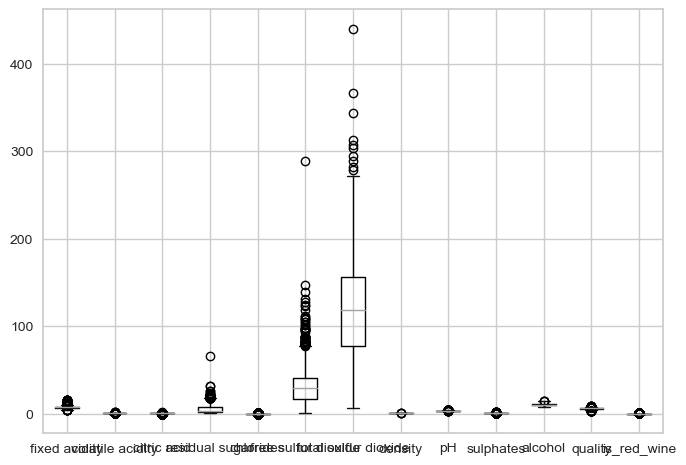

In [10]:
df2.boxplot()

Vemos que el atributo type es de tipo categórico por tanto debería codificar esta columna. Como se trata de colores (tipo de vino) utilizaré el OneHot Encoder para que no haya ordinalidad cuando no sea necesario.

In [31]:
rs_train = RobustScaler(with_centering=False).fit(X2_train_enc)
X2_train_norm = rs_train.transform(X2_train_enc)

rs_test = RobustScaler(with_centering=False).fit(X2_test_enc)
X2_test_norm = rs_test.transform(X2_test_enc)


MEJOR MÉTRICA

Como el dataset está desbalanceado no podemos fiarnos de la accuracy ya que si el modelo predeciera sólo para la clase mayoritaria, por ejemplo, el resultado de accuracy saldría bastante bien a pesar de tener un mal modelo. Por tanto, la mejor métrica se trata del F1-SCORE, ya que relaciona la precisión y el recall.

SELECCIÓN DE MODELOS DE CLASIFICACIÓN

Como el target es binario y el dataset está desbalanceado escogeré los modelos SVM y Random Forest para realizar los siguientes apartados.

MEJOR COMBINACIÓN DE PARÁMETROS

In [32]:
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 8


In [33]:
parameters_SVC = {"C": [0, 1.0, 2.0], "kernel": ("linear", "poly", "rbf"), "degree": [2,3,4], "gamma": ("scale", "auto"), 
                 "tol": [1e-1, 1e-3, 1e-6], "random_state": (None, 0)}
model = SVC()
clf = GridSearchCV(model, parameters_SVC, n_jobs=7)
clf.fit(X2_train_enc, y2_train)
clf.best_params_

C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 355, in _sparse_fit
    ) = libsvm_sparse.libsvm_sparse_train(
  Fil

{'C': 1.0,
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'linear',
 'random_state': None,
 'tol': 0.1}

In [35]:
parameters_LR = {"penalty":('l1', 'l2', "none"), "solver": ('lbfgs', 'liblinear'), "max_iter": [100, 1000, 5000],
                  "n_jobs": [None, -1, 10], "tol": [1e-4, 1e-1, 1e-7], "C": [0, 1.0, 10.0], "random_state": (None, 0)}
model = LogisticRegression()
clf = GridSearchCV(model, parameters_LR, n_jobs=-1)
clf.fit(X2_train_enc, y2_train)
clf.best_params_

C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
2430 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

{'C': 0,
 'max_iter': 100,
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001}

In [36]:
parameters_RF = {'n_estimators': [10, 100, 200], 'criterion': ('gini', 'entropy', 'log_loss'), 'bootstrap': (True, False), 
                  'n_jobs': (None, -1, 2), 'random_state': (None, 0)}
rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters_RF, n_jobs=7)
clf.fit(X2_train_enc, y2_train)
clf.best_params_

C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\apuma\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\apuma\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\apuma\anaconda3\lib\site-packages\

{'bootstrap': True,
 'criterion': 'gini',
 'n_estimators': 200,
 'n_jobs': 2,
 'random_state': None}

MEJOR COSTE COMPUTACIONAL

In [37]:
start = time.time()
svc = SVC(C=1.0, degree = 2, gamma = 'scale', kernel= 'linear', random_state= None, tol = 0.1)
svc.fit(X2_train_norm, y2_train)
end = time.time()

print("Coste computacional del modelo SVC:", end-start, "segundos.")

Coste computacional del modelo SVC: 0.7275221347808838 segundos.


In [38]:
start = time.time()
lr =LogisticRegression(C=0, max_iter=100, multi_class= 'auto', n_jobs=None, penalty='none', random_state=None, 
                       solver='lbfgs', tol= 0.0001)
lr.fit(X2_train_norm, y2_train)
end = time.time()

print("Coste computacional del modelo Logistic regression:", end-start, "segundos.")

Coste computacional del modelo Logistic regression: 0.08069205284118652 segundos.


C:\Users\apuma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [39]:
start = time.time()

rf = RandomForestClassifier(bootstrap = True, criterion = "gini", n_estimators = 100, n_jobs = None, random_state = None)
rf.fit(X2_train_norm, y2_train)
end = time.time()

print("Coste computacional del modelo RANDOM FOREST:", end-start, "segundos.")

Coste computacional del modelo RANDOM FOREST: 2.8514626026153564 segundos.


Se puede observar pues como el coste computacional del LR es menor ya que el tiempo de ejecución también es menor.

MEJOR THRESHOLD

In [40]:
def G_mean(y_true:list, y_score:list):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    # plot the roc curve for the model
    plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label='Logistic')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    # show the plot
    plt.show()
    return thresholds[ix]

Best Threshold=0.999998, G-Mean=1.000


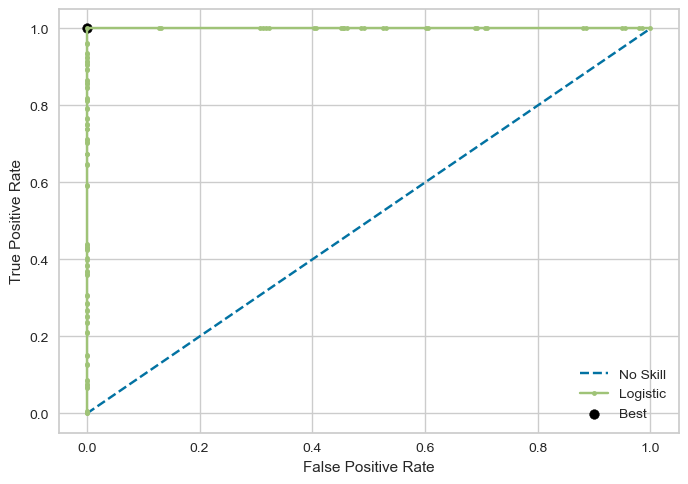

0.9999978720396686

In [41]:
#LR
y_pred_proba_LR = lr.predict_proba(X2_test_norm)
G_mean(y2_test, y_pred_proba_LR[:,1])


Vemos pues que el mejor threshold para separar las dos clases es 0.9999978720396686

Best Threshold=0.740000, G-Mean=1.000


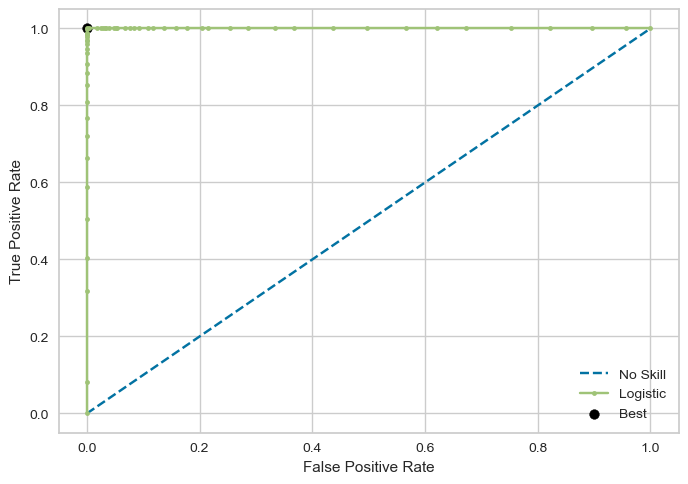

0.74

In [43]:
#RF
y_pred_proba_RF = rf.predict_proba(X2_test_norm)
G_mean(y2_test, y_pred_proba_RF[:,1])


MATRIZ DE CONFUSIÓN BINÁRIA

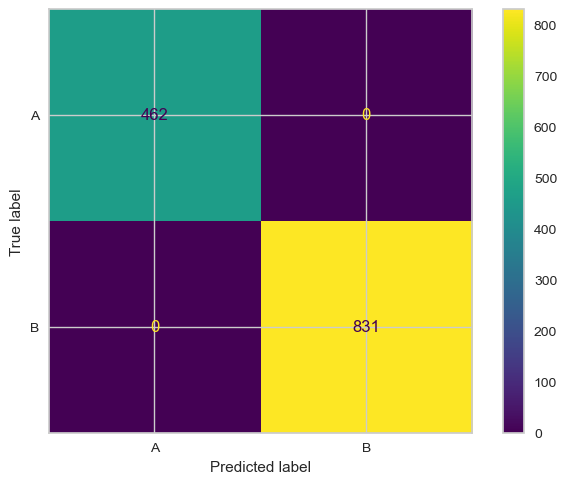

Accuracy del modelo SVC: 1.0
F1-SCORE del modelo SVC: 1.0


In [45]:
y_pred_SVC = svc.predict(X2_test_norm)
CM_SVC = confusion_matrix(y2_test, y_pred_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=CM_SVC, display_labels=["A","B"])
disp.plot(xticks_rotation="horizontal")
plt.legend(["A: Great Quality", "B: Poor Quality"])
plt.show()
print("Accuracy del modelo SVC:", accuracy_score(y2_test, y_pred_SVC))
print("F1-SCORE del modelo SVC:", f1_score(y2_test, y_pred_SVC))

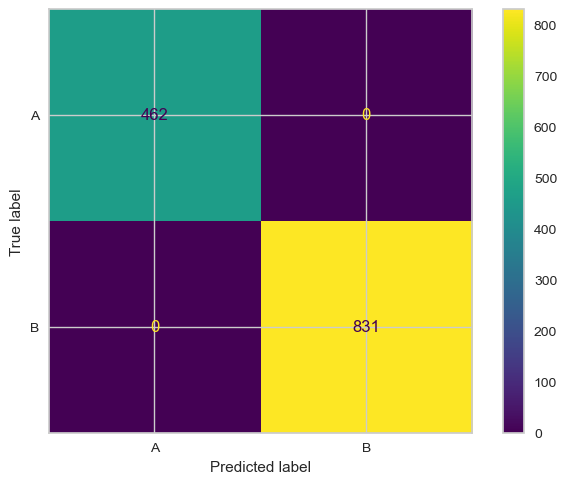

Accuracy del modelo Linear Regression: 1.0
F1-SCORE del modelo Linear Regression: 1.0


In [46]:
y_pred_LR = lr.predict(X2_test_norm)
CM_LR = confusion_matrix(y2_test, y_pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=CM_LR, display_labels=["A","B"])
disp.plot(xticks_rotation="horizontal")
plt.legend(["A: Great Quality", "B: Poor Quality"])
plt.show()

print("Accuracy del modelo Linear Regression:", accuracy_score(y2_test, y_pred_LR))
print("F1-SCORE del modelo Linear Regression:", f1_score(y2_test, y_pred_LR))

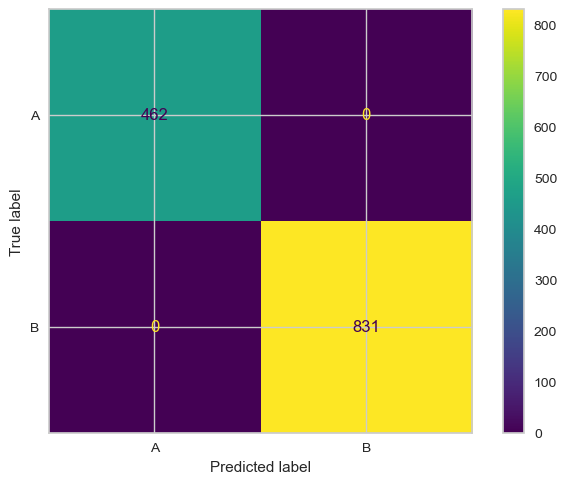

Accuracy del modelo RF: 1.0
F1-SCORE del modelo RF: 1.0


In [47]:
y_pred_RF = rf.predict(X2_test_norm)
CM_RF = confusion_matrix(y2_test, y_pred_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=CM_RF, display_labels=["A","B"])
disp.plot(xticks_rotation="horizontal")
plt.legend(["A: Great Quality", "B: Poor Quality"])
plt.show()

print("Accuracy del modelo RF:", accuracy_score(y2_test, y_pred_RF))
print("F1-SCORE del modelo RF:", f1_score(y2_test, y_pred_RF))

Se puede observar que para los tres modelos se obtienen buenos resultados. Esto implica que los datos estan perfectamente separados entre clases.